/usr/local/lib/python3.6/site-packages/rqdatac/client.py:190: UserWarning: rqdatac is already inited. Settings will be changed.
  warnings.warn("rqdatac is already inited. Settings will be changed.", stacklevel=0)


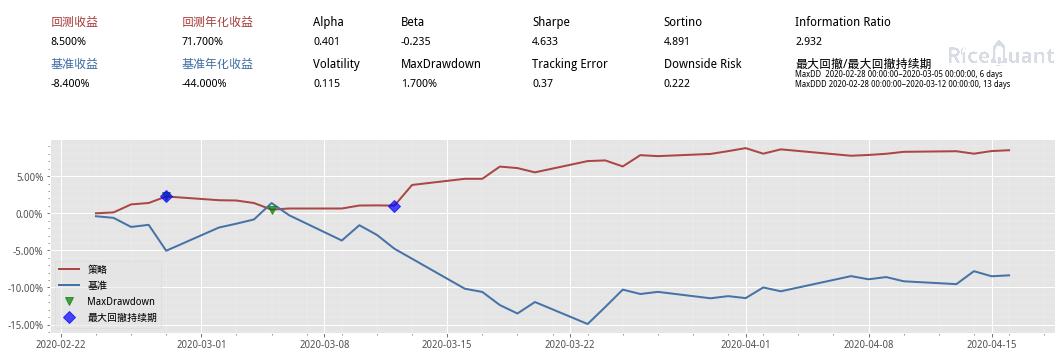

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2020-02-25 14:38:00,28.45284,16087328521910,4123.600,1,IF2004,16087328271910,OPEN,SELL,IF2004,0,2020-02-25 14:38:00,28.45284
2020-02-25 14:38:00,437.52000,16087328521911,1.823,300000,159925.XSHE,16087328271911,OPEN,BUY,南方300ETF,0,2020-02-25 14:38:00,437.52000
2020-02-26 09:31:00,28.11888,16087328521912,4075.200,1,IF2004,16087328271912,CLOSE,BUY,IF2004,0,2020-02-26 09:31:00,28.11888
2020-02-26 09:31:00,437.04000,16087328521913,1.821,300000,159925.XSHE,16087328271913,CLOSE,SELL,南方300ETF,0,2020-02-26 09:31:00,437.04000
2020-02-26 11:28:00,28.39350,16087328521914,4115.000,1,IF2004,16087328271914,OPEN,SELL,IF2004,0,2020-02-26 11:28:00,28.39350
2020-02-26 11:28:00,436.32000,16087328521915,1.818,300000,159925.XSHE,16087328271915,OPEN,BUY,南方300ETF,0,2020-02-26 11:28:00,436.32000
2020-02-27 09:33:00,28.25550,16087328521916,4095.000,1,IF2004,16087328271916,CLOSE,BUY,IF2004,0,2020-02-27 09:33:00,28.25550
2020-02-27 09:33:00,434.88000,16087328521917,1.812,300000,159925.XSHE,16087328271917,CLOSE,SELL,南方300ETF,0,2020-02-27 09:33:00,434.88000
2020-02-27 09:41:00,28.29000,16087328521918,4100.000,1,IF2004,16087328271918,OPEN,SELL,IF2004,0,2020-02-27 09:41:00,28.29000


In [ ]:
from rqalpha.api import *
from rqalpha import run_func
import tushare as ts
import pandas as pd
import numpy as np
import math
import talib
import datetime
from pandas.plotting import register_matplotlib_converters

config = {
  "base": {
    "start_date": "2020-02-24",
    "end_date": "2020-04-16",
    "frequency": "1m",
    "benchmark": "000300.XSHG",
    "accounts": {
        "stock": 1300000,
        "future":200000
    }
  },
  "extra": {
    "log_level": "warning",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    },
    "sys_simulation": {
      "enabled": True,     
      "volume_limit": False,
    },
      "sys_accounts": {
      "enabled": True,     
      "stock_t1": False,
    },
    "mongodb": {
        "enabled": False
    }
  }
}         

alpha1 = 0.0069;alpha2 = 0.1568;beta = 0.0008 #alpha1平非今仓手续费率，alpha2平今仓手续费率，betaETF交易费率

def init(context):
    context.s1 = '159925.XSHE'   # 交易标的，南方沪深300ETF
    context.s2 =  'IF2004' # 交易标的，沪深300股指期货
    context.s3 = '000300.XSHG'
    context.flag = 0 #期货仓位方向
    context.spread_list = [] #用于存放spread

def before_trading(context):
    context.today = 0 #用于判断是否为平今仓。如果为1，代表为平今仓，为0代表平非今仓。

def handle_bar(context, bar_dict):
    
    IFprice = bar_dict[context.s2].close 
    ETFprice  = bar_dict[context.s1].close
    spread = IFprice - ETFprice*1000 #求价差
    
    if datetime.date(context.now.year,context.now.month,context.now.day) == datetime.date(2020,2,24): #上市第一天，不进行交易，收集spread
        context.spread_list.append(spread)
        
    if datetime.date(context.now.year,context.now.month,context.now.day) != datetime.date(2020,2,24): #不是第一天，则开始交易
        del context.spread_list[0] #删除第一个数据
        context.spread_list.append(spread) #在最后一位添加数据
        mid = np.mean(context.spread_list) #求mid中轨，std标准差，up布林上轨，low布林下轨
        std = np.std(context.spread_list)
        up = mid+1*std
        low = mid-1*std
        cost_otherday = 2*alpha1*IFprice + 2*beta*300000*ETFprice #算出平非今仓的成本
        cost_today = 2*alpha2*IFprice + 2*beta*300000*ETFprice #算出平今仓的成本
        profit = 300*(spread-up) #理论收益
        
        if context.flag == 0 and spread > up and profit>cost_otherday: #判断条件,空仓
            sell_open(context.s2, 1) 
            order_lots(context.s1,3000)
            context.flag = -1
            context.today = 1
            
        if context.flag == -1: #若不为空仓
            if profit > cost_today and spread < up and context.today == 1: #是否满足平今仓的条件
                buy_close(context.s2, 1)
                order_lots(context.s1,-3000)
                context.flag = 0

            if spread < up and context.today == 0 #平非今仓
                buy_close(context.s2, 1)
                order_lots(context.s1,-3000)
                context.flag = 0

results=run_func(init=init,before_trading=before_trading,handle_bar=handle_bar,config=config)

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
results['sys_analyser']['trades']